
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./mcWhorter.ipynb" download="mcWhorter.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=mcWhorter.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2/mcWhorter/mcWhorter.py"><img src="https://img.shields.io/static/v1?label=Source:&message=mcWhorter.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/master?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/TH2M/H2/mcWhorter/mcWhorter.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:330px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="300"/></div>|<div style="width:330px"><img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="300"/></div>|
|---|---|--:|

# McWhorter Problem
<cite>[McWhorter and Sunada][1]</cite> propose an analytical solution to the two-phase flow equation. A one-dimensional problem was considered which describes the flow of two incompressible, immiscible fluids through a porous medium, where the wetting phase (water) displaces the non-wetting fluid (air or oil) in the horizontal direction (without the influence of gravity).


![mcWhorter_concept_schematic.png](figures/mcWhorter_concept.png)

## Analytical solution


A detailed semi-analytical solution and a convenient tool for calculating the solution for different material parameters can be found [here](https://mmg.fjfi.cvut.cz/~fucik/index.php?page=exact).

### Material Parameters

| Property                                                       | Symbol                 | Value                 | Unit   |
| -------------------------------------------------------------: | :--------------------- | --------------------- | ------ |
| Porosity                                                       | $\phi$                 | 0.15                  | 1      |
| Intrinsic permeability                                         | $K$                    | $$1.0\cdot 10^{-10}$$ | $m^2$  |
| Residual saturation of the wetting phase                       | $$s_\mathrm{L}^{res}$$ | 0.02                  | 1      |
| Residual saturation of the non-wetting phase                   | $$s_\mathrm{G}^{res}$$ | 0.001                 | 1      |
| Dynamic viscosity of the wetting phase                         | $\mu_\mathrm{L}$       | $$1.0\cdot 10^{-3}$$  | Pa s   |
| Dynamic viscosity of the non-wetting pha                       | $\mu_\mathrm{G}$       | $$5.0\cdot 10^{-3}$$  | Pa s   |
| Brooks and Corey model parameter: entry pressure               | $p_b$                  | 5000                  | Pa     |
| Brooks and Corey model parameter: pore size distribution index | $\lambda$              | 3.0                   | 1      |

### Problem Parameters

| Property                      | Symbol                | Value   | Unit   |
| ----------------------------: | :-------------------: | ------- | ------ |
| Initial saturation            | $$s_\mathrm{L}(t=0)$$ | 0.05    | 1      |
| Injection boundary saturation | $$s_\mathrm{L}(x=0)$$ | 0.8     | 1      |


[1]: https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/WR026i003p00399?casa_token=6yzGcmrd7dkAAAAA:E6QsKTxrf12GO-0CY6qgu4XEcX6iFM4O_mnaVV2gWBO8voVnxYXxLOtnAdUnBskEOPZiwaFAggWnmqpg

## Exact Solution

The exact solution is not yet calculated in this notebook, instead the [online tool](https://mmg.fjfi.cvut.cz/~fucik/index.php?page=exact) by Radek Fučík is used. This tool calculates the solution and outputs the results with arbitrary accuracy as CSV files, which are plotted below.

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot
import pyvista as pv

In [2]:
# Import analytical solution from a CSV file
reference = np.loadtxt("data/ref_solution_saturation.csv", delimiter=",")
ref_x, ref_saturation = reference.T

## Numerical Solution

In [3]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

In [4]:
# run OGS
model = ot.Project(input_file="mcWhorter_h2.prj", output_file="mcWhorter_h2.prj")
model.run_model(logfile=f"{out_dir}/out.txt", args=f"-o {out_dir}")

OGS finished with project file mcWhorter_h2.prj.
Execution took 16.040547132492065 s
Project file written to output.


In [5]:
# Read the OGS results and sample the last timestep on the same points as in
# the reference.
ms = ot.MeshSeries(f"{out_dir}/result_McWhorter_H2.pvd")
pts = pv.PointSet([(x, 0, 0) for x in ref_x])
sL_num = pts.sample(ms.mesh(-1))["saturation"]

# Absolute and relative errors
err_abs = ref_saturation - sL_num
err_rel = err_abs / ref_saturation
assert np.all(np.abs(err_rel) < 0.5)

Text(0.5, 0.98, 'Liquid saturation and errors at t=1000.0 seconds')

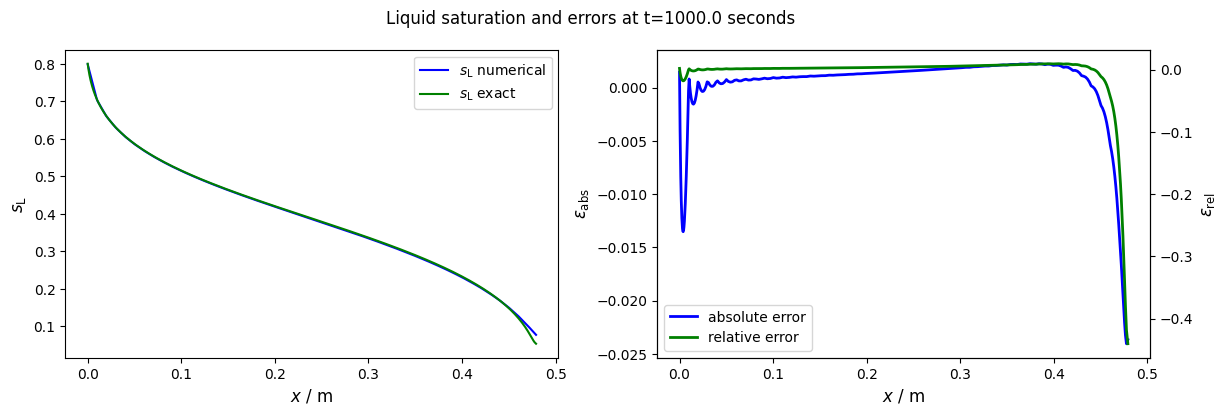

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
ax3 = ax2.twinx()

ax1.plot(ref_x, sL_num, "b", label=r"$s_\mathrm{L}$ numerical")
ax1.plot(ref_x, ref_saturation, "g", label=r"$s_\mathrm{L}$ exact")
lns_abs = ax2.plot(ref_x, err_abs, "-b", lw=2, label=r"absolute error")
lns_rel = ax3.plot(ref_x, err_rel, "-g", lw=2, label=r"relative error")

lns = lns_abs + lns_rel
ax1.legend()
ax2.legend(lns, [label.get_label() for label in lns])

ax1.set_xlabel("$x$ / m", fontsize=12)
ax1.set_ylabel(r"$s_\mathrm{L}$", fontsize=12)
ax2.set_xlabel("$x$ / m", fontsize=12)
ax2.set_ylabel(r"$\epsilon_\mathrm{abs}$", fontsize=12)
ax3.set_ylabel(r"$\epsilon_\mathrm{rel}$", fontsize=12)
time = ms.timevalues[-1]
fig.suptitle(f"Liquid saturation and errors at t={time} seconds")

The numerical approximation fits the analytical solution very well in the whole area. Only in the area of the saturation front are deviations recognisable. These deviations are mainly due to the grid resolution and are well known in multiphase simulations. The error can be reduced almost arbitrarily by lowering the size of the grid elements.